## Test Distribution Visualization

In [14]:
from RTER import RegressionTree
from distribution import TestDistribution
import numpy as np


from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from time import time

from comparison.ensemble import RegressionTreeBoosting, RegressionTreeEnsemble
from comparison.EKNN import EKNN
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import GradientBoostingRegressor

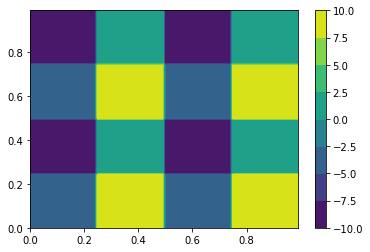

In [2]:
generator=TestDistribution(9).returnDistribution()
np.random.seed(3)

axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T

predict_result=generator.evaluate(X_grid).reshape(-1,100)
plt.contourf(axis0, axis1,predict_result) #,vmin=0,vmax=20)
plt.colorbar()

In [3]:
generator=TestDistribution(9).returnDistribution()
np.random.seed(3)
X_train,Y_train=generator.generate(3000)
X_test,Y_test = generator.generate(1000)
axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
max_depth,order, truncate_ratio_low, truncate_ratio_up , r_range_low, r_range_up ,step, lamda = 15,1,0,0.6,0,1,1, 0
model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="varreduction",
                         min_samples_split=3,
                         max_depth=max_depth,
                         order=order,
                         random_state=4,
                         truncate_ratio_low= truncate_ratio_low,
                         truncate_ratio_up= truncate_ratio_up,
                         step = step,
                         lamda = lamda)
model.fit(X_train, Y_train)
predict_result=model.predict(X_grid).reshape(-1,100)
plt.contourf(axis0, axis1,predict_result) #,vmin=0,vmax=20)
plt.colorbar()

MSE(model.predict(X_test),Y_test)

LinAlgError: Matrix is singular to machine precision.

In [ ]:
node_idx=9
query_obj=list(model.tree_.leafnode_fun.values())[node_idx]
X_range,dt_X, dt_Y = query_obj.X_range, query_obj.dt_X, query_obj.dt_Y
X_range

GradientBoostingRegressor(n_estimators=500)

1.2783705315375105

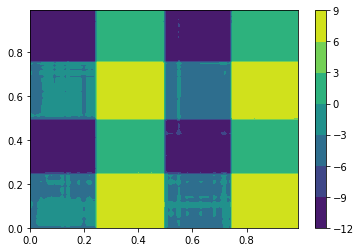

In [19]:
model_GBRT = GradientBoostingRegressor(n_estimators = 500)

model_GBRT.fit(X_train, Y_train)
y_hat=model_GBRT.predict(X_test)
mse_score = MSE(y_hat, Y_test)
mse_score
predict_result=model_GBRT.predict(X_grid).reshape(-1,100)
plt.contourf(axis0, axis1,predict_result) #,vmin=0,vmax=20)
plt.colorbar()

In [16]:

generator=TestDistribution(3).returnDistribution()
np.random.seed(3)
X_train,Y_train=generator.generate(3000)
X_test,Y_test = generator.generate(1000)


model_GBRT = GradientBoostingRegressor(n_estimators = 500)

model_GBRT.fit(X_train, Y_train)
y_hat=model_GBRT.predict(X_test)
mse_score = MSE(y_hat, Y_test)
mse_score

max_depth , order, truncate_ratio_low, truncate_ratio_up , r_range_low, r_range_up ,step, lamda =6, 1,0,0.6,0,1,2, 0.001


model = RegressionTree(estimator="naive_estimator",
                         splitter="maxedge",
                         min_samples_split=5,
                         max_depth=5,
                         order=order,
                         random_state=1,
                         truncate_ratio_low=truncate_ratio_low,
                         truncate_ratio_up= truncate_ratio_up,
                      r_range_low=r_range_low,
                      r_range_up=r_range_up,
                      step=step,
                      lamda = lamda)
model.fit(X_train, Y_train)
MSE(model.predict(X_test),Y_test)

model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="varreduction",
                         min_samples_split=5,
                         max_depth=max_depth,
                         order=order,
                         random_state=1,
                         truncate_ratio_low=truncate_ratio_low,
                         truncate_ratio_up= truncate_ratio_up,
                      r_range_low=r_range_low,
                      r_range_up=r_range_up,
                      step=step,
                      lamda = lamda)
model.fit(X_train, Y_train)
MSE(model.predict(X_test),Y_test)




GradientBoostingRegressor(n_estimators=500)

167.2057502948516

30476.697196049055

805.6007052231561

array([[0.        , 0.        , 0.        , 0.        ],
       [1.        , 1.        , 0.46369689, 1.        ]])

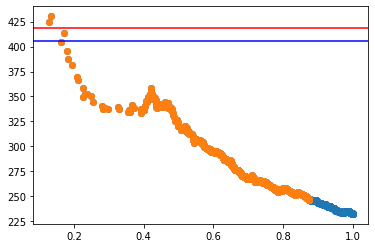

In [12]:
node_idx=0
query_obj=list(model.tree_.leafnode_fun.values())[node_idx]
X_range,dt_X, dt_Y = query_obj.X_range, query_obj.dt_X, query_obj.dt_Y
X_range
X_extra= X_range.mean(axis=0)+0.12
order, truncate_ratio_low, truncate_ratio_up = order, truncate_ratio_low, truncate_ratio_up 

sorted_ratio, sorted_prediction, intercept ,_= model.get_node_extrapolation(dt_X, dt_Y, X_extra, X_range, order, truncate_ratio_low, truncate_ratio_up,0,1,step,lamda)
_=plt.scatter((sorted_ratio),sorted_prediction)
_=plt.scatter((sorted_ratio)[int(len(sorted_ratio)*truncate_ratio_low):int(len(sorted_ratio)*truncate_ratio_up)],sorted_prediction[int(len(sorted_prediction)*truncate_ratio_low):int(len(sorted_prediction)*truncate_ratio_up)])
_=plt.axhline(intercept,color="red")
_=plt.axhline(generator.evaluate(X_extra.reshape(1,-1)),color="blue")

In [38]:
X = np.arange(-1,1,0.001)
Y = np.exp(-((X-0.4)/0.1)**2)+np.exp(-((X+0.4)/0.1)**2)

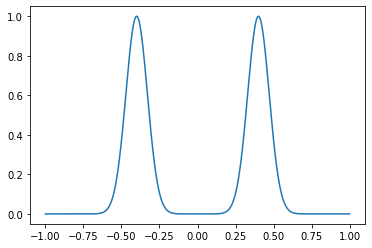

In [39]:
plt.plot(X,Y)

In [44]:
model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="varreduction",
                         min_samples_split=1,
                         max_depth=1,
                         order=order,
                         random_state=1,
                         truncate_ratio_low=truncate_ratio_low,
                         truncate_ratio_up= truncate_ratio_up,
                      r_range_low=r_range_low,
                      r_range_up=r_range_up,
                      step=step,
                      lamda = lamda)

In [49]:
model.fit(X.reshape(-1,1), Y)
node_idx = 0
query_obj=list(model.tree_.leafnode_fun.values())[node_idx]
X_range,dt_X, dt_Y = query_obj.X_range, query_obj.dt_X, query_obj.dt_Y

In [10]:
a= np.array([1,2,3,1])

In [9]:
np.unique(a)

array([1, 2, 3])

In [11]:
np.quantile(a,[i/10 for i in range(10)])

array([1. , 1. , 1. , 1. , 1.2, 1.5, 1.8, 2.1, 2.4, 2.7])

In [21]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data_file_dir = "./data/real_data_cleaned/"

data_file_name = "abalone.csv"

log_file_dir = "./results/realdata/"


data_name = os.path.splitext(data_file_name)[0]
data_file_path = os.path.join(data_file_dir, data_file_name)
data = pd.read_csv(data_file_path)
data = np.array(data)
X = data[:,1:]
y = data[:,0]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)



In [24]:
X

array([[0.        , 0.5135135 , 0.5210084 , ..., 0.1503025 , 0.132324  ,
        0.147982  ],
       [0.        , 0.3716215 , 0.352941  , ..., 0.066241  , 0.0631995 ,
        0.068261  ],
       [0.5       , 0.614865  , 0.6134455 , ..., 0.1718225 , 0.1856485 ,
        0.207773  ],
       ...,
       [0.        , 0.7094595 , 0.7058825 , ..., 0.3527235 , 0.37788   ,
        0.305431  ],
       [0.5       , 0.743243  , 0.722689  , ..., 0.3564225 , 0.342989  ,
        0.293473  ],
       [0.        , 0.858108  , 0.840336  , ..., 0.6351715 , 0.49506254,
        0.49177875]])